**1. Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Importing the dataset**

In [2]:
data_model = pd.read_csv('data_numerical.csv')
data_model.head(10)

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,0


**3. Separating the dependent and independent variables**

In [3]:
y = data_model['churn']
X = data_model.drop(['churn'], axis = 1)

**4. Splitting the dataset into the Training set and Test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

**5. Checked for outliers in the column 'tenure_months' of the train dataset**

<Axes: >

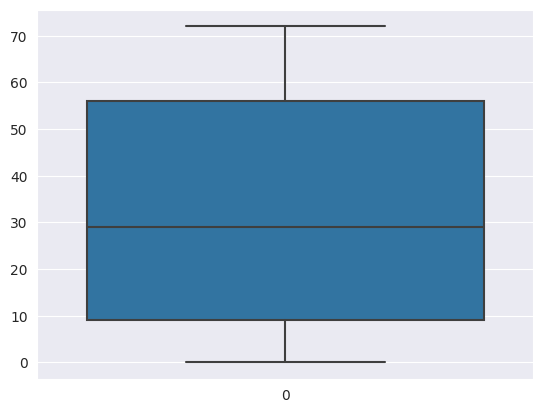

In [5]:
sns.boxplot(X_train['tenure_months'])

**6. Trained a model using Logistic Regression**

In [6]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(random_state = 0, max_iter=1000)
lrclassifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

**7. Predicting the Test set results**

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lrclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[931 110]
 [202 166]]


0.7785663591199432

**Conclusion:**
Confusion matrix shows that 930+166 = 1097 correct predictions and 202+110 = 313 incorrect predictions.

**8. Trained a model using Random Forest Classifier**

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**9. Predicting the Test set results**

In [9]:
y_pred = rfclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[921 120]
 [218 150]]
0.7601135557132718


**Conclusion:**
Confusion matrix shows that 921+150 = 1071 correct predictions and 120+218 = 338 incorrect predictions.

**10. Trained a model using XGBoost Classifier**

In [10]:
from xgboost import XGBClassifier
xgbclassifier = XGBClassifier()
xgbclassifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**11. Predicting the Test set results**

In [11]:
y_pred = xgbclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7693399574166075
[[887 154]
 [171 197]]


**Conclusion:**
Confusion matrix shows that 887+197 = 1084 correct predictions and 171+154 = 325 incorrect predictions.

**12. Trained a model using Support Vector Classifier**

In [12]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

**13. Predicting the Test set results**

In [13]:
y_pred = svcclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7750177430801988
[[934 107]
 [210 158]]


**Conclusion:**
Confusion matrix shows that 934+158 = 1092 correct predictions and 210+107 = 317 incorrect predictions.

**14. Trained a model using K-Nearest Neighbors Classifier**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5)
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier()

**15. Predicting the Test set results**

In [15]:
y_pred = knnclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

**16. Training a model using Naive Bayes Classifier**

In [16]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

GaussianNB()

**17. Predicting the Test set results**

In [17]:
y_pred = nbclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7409510290986515
[[783 258]
 [107 261]]


**Conclusion:**
Confusion matrix shows that 783+261 = 1044 correct predictions and 107+258 = 365 incorrect predictions.

**18. Trained a model using Decision Tree Classifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**19. Predicting the Test set results**

In [19]:
y_pred = dtclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7381121362668559
[[845 196]
 [173 195]]


**Conclusion:**
Confusion matrix shows that 845+195 = 1040 correct predictions and 173+196 = 369 incorrect predictions.

**20. Trained a model using Gradient Boosting Classifier**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbclassifier = GradientBoostingClassifier()
gbclassifier.fit(X_train, y_train)

GradientBoostingClassifier()

**21. Predicting the Test set results**

In [21]:
y_pred = gbclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.794889992902768
[[935 106]
 [183 185]]


**Conclusion:**
Confusion matrix shows that 935+185 = 1120 correct predictions and 183+106 = 289 incorrect predictions.

**22. Trained a model using AdaBoost Classifier**

In [22]:
from sklearn.ensemble import AdaBoostClassifier
abclassifier = AdaBoostClassifier()
abclassifier.fit(X_train, y_train)

AdaBoostClassifier()

**23. Predicting the Test set results**

In [23]:
y_pred = abclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7892122072391767
[[923 118]
 [179 189]]


**Conclusion:**
Confusion matrix shows that 923+189 = 1112 correct predictions and 179+118 = 297 incorrect predictions.

**24. Trained a model using Bagging Classifier**

In [24]:
from sklearn.ensemble import BaggingClassifier
bgclassifier = BaggingClassifier()
bgclassifier.fit(X_train, y_train)

BaggingClassifier()

**25. Predicting the Test set results**

In [25]:
y_pred = bgclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7693399574166075
[[910 131]
 [194 174]]


**26. Trained a model using Extra Trees Classifier**

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
etclassifier = ExtraTreesClassifier()
etclassifier.fit(X_train, y_train)

ExtraTreesClassifier()

**27. Predicting the Test set results**

In [27]:
y_pred = etclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

0.7601135557132718
[[909 132]
 [206 162]]


**28. Trained a model using Stochastic Gradient Descent Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdclassifier = SGDClassifier()
sgdclassifier.fit(X_train, y_train)

**29. Predicting the Test set results**

In [ ]:
y_pred = sgdclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(cm)

**Conclusão Final:**
O modelo que obteve melhor acurácia foi Gradient Boost Classifier. **Exportamos ele em um arquivo pickle para ser utilizado em produção.**

In [28]:
import pickle as pk
pk.dump(gbclassifier, open('model.pkl', 'wb'))

In [29]:
data_model.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type',
       'paperless_billing', 'payment_method', 'churn'],
      dtype='object')